[2024-10-25 Fiddler](https://thefiddler.substack.com/p/can-you-solve-the-tricky-mathematical)
====================

Fiddler
-------

If there are $C$ kernels of candy corn and $N$ peanut butter cups, the probability
of removing $k$ peanut butter cups is

In [1]:
i = var('i')
p(C,N,k) = product((N-i)/(C+N-i),i,0,k-1)
show(p)

(C, N, k) |--> factorial(C + N - k)*factorial(N)/(factorial(C + N)*factorial(N - k))

Consider $C$ having probability $1/M$ of being $0, 1, \ldots M-1$.  The expected value of $C$
is

In [2]:
C_exp(M,N,k) = sum(C*p(C,N,k)/M, C, 0, M-1)/sum(p(C,N,k)/M, C, 0, M-1)
show(C_exp)

(M, N, k) |--> (M*k*factorial(M + N - 1)*factorial(N - k) - M*factorial(M + N - 1)*factorial(N - k))*((N^2 + N)*factorial(M + N - 1)*factorial(N - k) + (M - N - 1)*factorial(M + N - k)*factorial(N) - (N*factorial(M + N - 1)*factorial(N - k) + (M - 1)*factorial(M + N - k)*factorial(N))*k)/((M*k^2*factorial(M + N - 1)*factorial(N - k) - 3*M*k*factorial(M + N - 1)*factorial(N - k) + 2*M*factorial(M + N - 1)*factorial(N - k))*(N*factorial(M + N - 1)*factorial(N - k) - factorial(M + N - k)*factorial(N)))

In [3]:
show(C_exp(M,3,3))
show(C_exp(M,3,3).limit(M=oo))

-(6*(M - 1)*factorial(M) - 2*(M - 4)*factorial(M) - factorial(M + 2))/(factorial(M + 2) - 2*factorial(M))

1

So I'd expect one kernel.

Extra credit
------------

In [4]:
assume(k <= N)
show(C_exp(M,N,k))
show(C_exp(M,N,k).limit(M=oo))
show(C_exp(M,N,k).simplify_full().limit(M=oo).simplify_full())

(M*k*factorial(M + N - 1)*factorial(N - k) - M*factorial(M + N - 1)*factorial(N - k))*((N^2 + N)*factorial(M + N - 1)*factorial(N - k) + (M - N - 1)*factorial(M + N - k)*factorial(N) - (N*factorial(M + N - 1)*factorial(N - k) + (M - 1)*factorial(M + N - k)*factorial(N))*k)/((M*k^2*factorial(M + N - 1)*factorial(N - k) - 3*M*k*factorial(M + N - 1)*factorial(N - k) + 2*M*factorial(M + N - 1)*factorial(N - k))*(N*factorial(M + N - 1)*factorial(N - k) - factorial(M + N - k)*factorial(N)))

limit((M*k*factorial(M + N - 1)*factorial(N - k) - M*factorial(M + N - 1)*factorial(N - k))*((N^2 + N)*factorial(M + N - 1)*factorial(N - k) + (M - N - 1)*factorial(M + N - k)*factorial(N) - (N*factorial(M + N - 1)*factorial(N - k) + (M - 1)*factorial(M + N - k)*factorial(N))*k)/((M*k^2*factorial(M + N - 1)*factorial(N - k) - 3*M*k*factorial(M + N - 1)*factorial(N - k) + 2*M*factorial(M + N - 1)*factorial(N - k))*(N*factorial(M + N - 1)*factorial(N - k) - factorial(M + N - k)*factorial(N))), M, +Infinity)

-limit(((N^2 + N)*factorial(M + N - 1)*factorial(N - k) + (M - N - 1)*factorial(M + N - k)*factorial(N) - (N*factorial(M + N - 1)*factorial(N - k) + (M - 1)*factorial(M + N - k)*factorial(N))*k)/(2*N*factorial(M + N - 1)*factorial(N - k) - (N*factorial(M + N - 1)*factorial(N - k) - factorial(M + N - k)*factorial(N))*k - 2*factorial(M + N - k)*factorial(N)), M, +Infinity)

Focusing on the numerator and denominator separately

In [5]:
C_exp(M,N,k).numerator().simplify_full()

-(M - 1)*k*factorial(M + N - k)*factorial(N) + N*factorial(M + N - 1)*factorial(N - k + 1) + (M - N - 1)*factorial(M + N - k)*factorial(N)

In [6]:
C_exp(M,N,k).denominator().simplify_full()

-2*N*factorial(M + N - 1)*factorial(N - k) + (N*factorial(M + N - 1)*factorial(N - k) - factorial(M + N - k)*factorial(N))*k + 2*factorial(M + N - k)*factorial(N)

When $M$ is large, the $(M+N-1)!$ terms dominate, giving the answer

In [7]:
show((N*factorial(N-k+1)/(-2*N*factorial(N-k) + N*factorial(N-k)*k)).simplify_full())

(N - k + 1)/(k - 2)

In [8]:
for N in [3..10]:
    for k in [3..N]:
        print((N,k,(N-k+1)/(k-2)))

(3, 3, 1)
(4, 3, 2)
(4, 4, 1/2)
(5, 3, 3)
(5, 4, 1)
(5, 5, 1/3)
(6, 3, 4)
(6, 4, 3/2)
(6, 5, 2/3)
(6, 6, 1/4)
(7, 3, 5)
(7, 4, 2)
(7, 5, 1)
(7, 6, 1/2)
(7, 7, 1/5)
(8, 3, 6)
(8, 4, 5/2)
(8, 5, 4/3)
(8, 6, 3/4)
(8, 7, 2/5)
(8, 8, 1/6)
(9, 3, 7)
(9, 4, 3)
(9, 5, 5/3)
(9, 6, 1)
(9, 7, 3/5)
(9, 8, 1/3)
(9, 9, 1/7)
(10, 3, 8)
(10, 4, 7/2)
(10, 5, 2)
(10, 6, 5/4)
(10, 7, 4/5)
(10, 8, 1/2)
(10, 9, 2/7)
(10, 10, 1/8)


### Simulations

The results from running [simulations](20241025.go) agree reasonably well for $k > 3$.
The simulation results for $k = 3$ seem to approach the answer with increasing $M$.

    $ go run 20241025.go
    M=50 N=3 k=3 2217975/2398616 0.924689 (1.000000)
    M=100 N=3 k=3 1157909/1201804 0.963476 (1.000000)
    M=150 N=3 k=3 780356/800857 0.974401 (1.000000)
    M=50 N=4 k=3 5691953/3189846 1.784397 (2.000000)
    M=100 N=4 k=3 3008596/1599373 1.881110 (2.000000)
    M=150 N=4 k=3 2062138/1065943 1.934567 (2.000000)
    M=50 N=4 k=4 1058202/2131241 0.496519 (0.500000)
    M=50 N=5 k=3 10270054/3982256 2.578954 (3.000000)
    M=100 N=5 k=3 5562796/2000369 2.780885 (3.000000)
    M=150 N=5 k=3 3801067/1333265 2.850946 (3.000000)
    M=50 N=5 k=4 2636031/2667499 0.988203 (1.000000)
    M=50 N=5 k=5 667969/1999904 0.334001 (0.333333)
    M=50 N=6 k=3 15846500/4768134 3.323418 (4.000000)
    M=100 N=6 k=3 8698826/2394261 3.633199 (4.000000)
    M=150 N=6 k=3 5976960/1596297 3.744266 (4.000000)
    M=50 N=6 k=4 4701180/3197992 1.470041 (1.500000)
    M=50 N=6 k=5 1600196/2400661 0.666565 (0.666667)
    M=50 N=6 k=6 478853/1918668 0.249576 (0.250000)
    M=50 N=7 k=3 22258746/5545565 4.013792 (5.000000)
    M=100 N=7 k=3 12436101/2791171 4.455514 (5.000000)
    M=150 N=7 k=3 8645287/1863991 4.638052 (5.000000)
    M=50 N=7 k=4 7256842/3730493 1.945277 (2.000000)
    M=50 N=7 k=5 2796929/2800899 0.998583 (1.000000)
    M=50 N=7 k=6 1120354/2240197 0.500114 (0.500000)
    M=50 N=7 k=7 372731/1863693 0.199996 (0.200000)

And the simulations agree very well with the expressions for finite $M$.

In [9]:
for N in [3..7]:
    for k in [3..N]:
        for M in ([50] if k != 3 else [50,100,150]):
            c = C_exp(M,N,k)
            cc = (N-k+1)/(k-2)
            print(f"M={M} N={N} k={k} {c} {numerical_approx(c)} ({cc} {numerical_approx(cc)})")

M=50 N=3 k=3 49/53 0.924528301886792 (1 1.00000000000000)
M=100 N=3 k=3 99/103 0.961165048543689 (1 1.00000000000000)
M=150 N=3 k=3 149/153 0.973856209150327 (1 1.00000000000000)
M=50 N=4 k=3 98/55 1.78181818181818 (2 2.00000000000000)
M=100 N=4 k=3 66/35 1.88571428571429 (2 2.00000000000000)
M=150 N=4 k=3 298/155 1.92258064516129 (2 2.00000000000000)
M=50 N=4 k=4 931/1874 0.496798292422625 (1/2 0.500000000000000)
M=50 N=5 k=3 49/19 2.57894736842105 (3 3.00000000000000)
M=100 N=5 k=3 297/107 2.77570093457944 (3 3.00000000000000)
M=150 N=5 k=3 447/157 2.84713375796178 (3 3.00000000000000)
M=50 N=5 k=4 245/248 0.987903225806452 (1 1.00000000000000)
M=50 N=5 k=5 2107/6325 0.333122529644269 (1/3 0.333333333333333)
M=50 N=6 k=3 196/59 3.32203389830508 (4 4.00000000000000)
M=100 N=6 k=3 396/109 3.63302752293578 (4 4.00000000000000)
M=150 N=6 k=3 596/159 3.74842767295597 (4 4.00000000000000)
M=50 N=6 k=4 3087/2098 1.47140133460439 (3/2 1.50000000000000)
M=50 N=6 k=5 13622/20463 0.665689292870

And graphing the expected number of kernels versus $M$ shows that when
$k = 3$, it converges to the $M = \infty$ value much more slowly then
when $k = 4$.

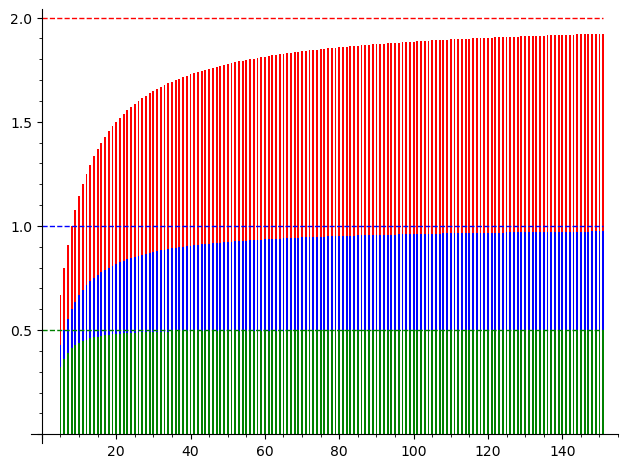

In [10]:
bar_chart([0,0,0,0,0]+[numerical_approx(C_exp(x,4,3)) for x in [4..150]],color='red') \
+ plot(2,x,0,151,color='red',linestyle='dashed') \
+ bar_chart([0,0,0,0,0]+[numerical_approx(C_exp(x,3,3)) for x in [4..150]],color='blue') \
+ plot(1,x,0,151,color='blue',linestyle='dashed') \
+ bar_chart([0,0,0,0,0]+[numerical_approx(C_exp(x,4,4)) for x in [4..150]],color='green') \
+ plot(0.5,x,0,151,color='green',linestyle='dashed')

Making the rounds
-----------------

When imparting energy $E$ to the projectile, where $mv^2/2$ is its horizontal kinetic
energy.  Then, $mgh + mv^2/2 = E$, where $h = E/mg - v^2/2g$ is the maximum height
reached by the projectile.

The vertical path is $y = h - g(t-t_m)^2/m$, where $t_m = \sqrt{hm/g}$.

The horizontal path is $x = vt$.

Consider half of the trajectory, since the length of the second half is the same as the
length of the first half.

Choose units where $E = 1$, $m = 1$, $g = 1$.

The horizontal distance traveled is $vt_m = v\sqrt{2-v^2}$.


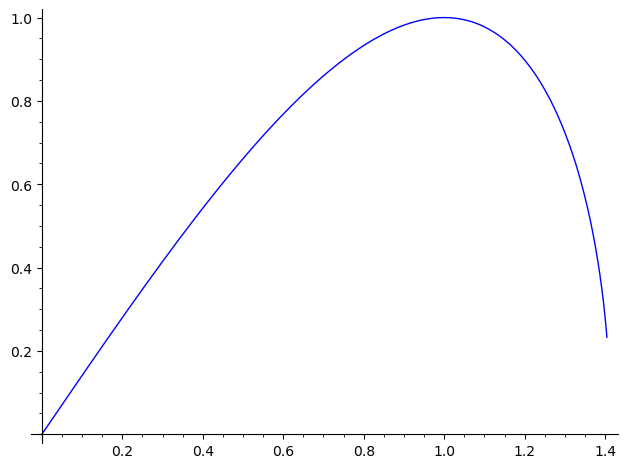

In [11]:
plot(x*sqrt(2-x^2), x, 0, sqrt(2))

In [12]:
solve(derivative(x*sqrt(2-x^2),x) == 0, x)

[x == -1, x == 1]

So, to maximize the horizontal distance traveled, $v = 1$, so half the initial kinetic energy
is horizontal and half is vertical, confirming the 45° result.

The length of the trajectory is

In [13]:
v,t = var('v,t')
h = 1 - v^2/2
t_m = sqrt(h)
assume(v > 0)
assume(v^2-2 < 0)
L = integral(sqrt(v^2 + (-2*(t-t_m))^2), t, 0, t_m)
show(L)

1/4*v^2*arcsinh(1/2*sqrt(-8*v^4 + 16*v^2)/v^2) + 1/2*sqrt(1/2*v^4 - 3*v^2 + 4)

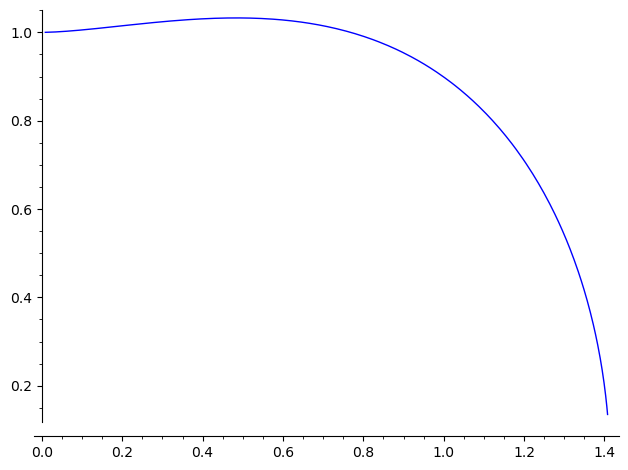

In [14]:
plot(L, v, 0, sqrt(2))

In [15]:
show(solve(derivative(L, v) == 0, v))

[v^2 == -(sqrt(1/2*v^4 - 3*v^2 + 4)*sqrt(-8*v^4 + 16*v^2)*sqrt(-(v^2 - 4)/v^2)*arcsinh(1/2*sqrt(-8*v^4 + 16*v^2)/v^2) - 3*sqrt(-8*v^4 + 16*v^2)*sqrt(-(v^2 - 4)/v^2) - 4*sqrt(1/2*v^4 - 3*v^2 + 4))/(sqrt(-8*v^4 + 16*v^2)*sqrt(-(v^2 - 4)/v^2))]

In [16]:
find_local_maximum(L, 0.1, 1.4)

(1.0326690694873524, 0.48423147285073653)

In [17]:
v_x = find_local_maximum(L, 0.1, 1.4)[1]
v_y = sqrt(2 - v_x^2)
angle = arctan(v_y/v_x)
numerical_approx(angle*180/pi)

69.9766325497837

So, maximizing the trajectory length means throwing at an angle of almost 70°, with a trajectory
length of about 3% more than throwing straight up, and about 15% more than throwing at an angle
of 45°.

In [18]:
numerical_approx(L.substitute(v == v_x)/L.substitute(v == 1))

1.14878045180443

In [19]:
y(v,x) = 1-v^2/2 - (x/v - sqrt(1-v^2/2))^2

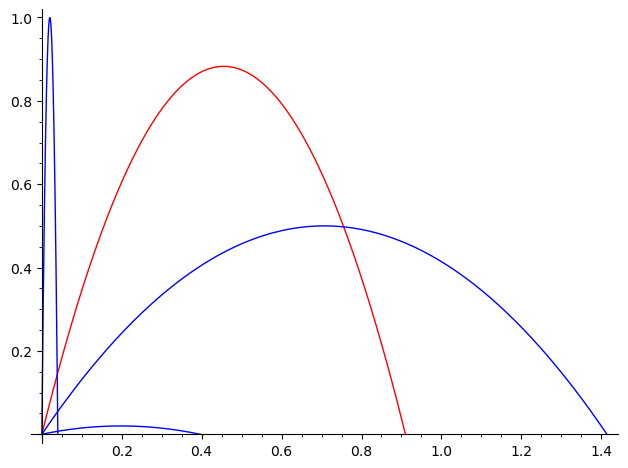

In [20]:
plot(y(v_x,x),x,0,2*v_x*sqrt(1-v_x^2/2),color='red') \
 + plot(y(1,x),x,0,sqrt(2)) \
 + plot(y(0.02,x), x, 0, 2*0.02*sqrt(1-(0.02)^2/2)) \
 + plot(y(1.4,x), x, 0, 2*1.4*sqrt(1-(1.4)^2/2))